In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import sys
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords

import re
from tqdm import tqdm
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

sys.path.append('../src/')
from utils.eda import plot_moving_average

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Роман\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Роман\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Роман\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
items = pd.read_parquet('../data/processed/items.parquet.gzip')

In [6]:
russian_stopwords = stopwords.words("russian")
# adding popular useless words from dataset to stopwords
russian_stopwords.extend(['фото', 'ссылки', 'очень', 'http', 'https', 'артикулы', 
                          'т', 'итог', "пов", "pov", 'первым', "это", "лук",
                          "ещ", "i", 'ссылка', '1', 'приш', "м", 'd', "вещи", 
                          "л", "n", 's', 'шь', "размер", "лука", "ч", 
                          "а", "e", 'm', 't', "u", 'l', 'wb', 'просто'
                         ])
def clean_text(text: str) -> str:
    """Cleans text data by removing stopwords, punctuation, etc.

    Args:
        text_data (str): The raw text data.
    Returns:
        str: The cleaned text data.
    """
    # Remove some bad symbols
    text = re.sub('\\n', ' ', text)
 
    # Lower case everything
    text = text.lower()

    # remove symbols and numbers
    text = re.sub(r"[^A-Za-zА-Яа-я]", " ", text)
    
    # tokenizing
    tokens = TreebankWordTokenizer().tokenize(text)
    tokens = [token for token in tokens if token not in russian_stopwords]

    # lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # make a text
    text = " ".join(tokens)

    # clean unnecessary symbols
    text = re.sub(' n ', ' ', text)
    text = re.sub(' n', ' ', text)
    return text

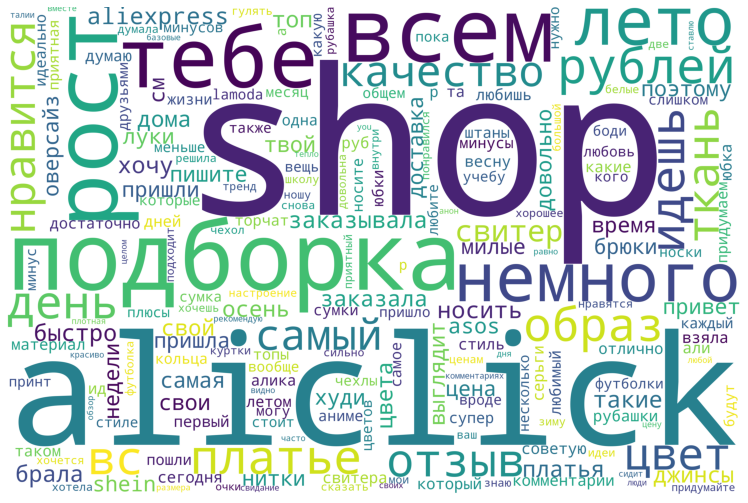

In [9]:
text = str(list(items.text.values))
text = clean_text(text)

def plot_cloud(wordcloud: WordCloud, save_path: str, save: bool = False, ) -> None:
    """Plot a WordCloud object from text data.

    Args:
        wordcloud (WordCloud): The WordCloud object to plot.
        save_path (str): The path to save the image if save=True.
        save (bool, optional): Whether to save the image. Defaults to False.
    """
    plt.figure(figsize=(16, 9)) 
    plt.imshow(wordcloud)  
    plt.axis("off") 
    if save:
        plt.savefig(save_path)

wordcloud = WordCloud(width=3000, 
                      height=2000, 
                      random_state=1, 
                      background_color='white', 
                      #colormap='Pastel1', 
                      collocations=False, 
                      stopwords=russian_stopwords).generate(text) 
plot_cloud(wordcloud, save_path='../reports/figures/wordcloud.png') 

In [2]:
posts = pd.read_json('../data/interim/cleared/looksource-posts-cleared.json')
posts2 = pd.read_json('../data/interim/cleared/lookconstructor-posts-cleared.json')
posts3 = pd.read_json('../data/interim/cleared/looksales-posts-cleared.json')

ts = posts.sort_values('date')[['date', 'likes']].set_index('date')
ts2 = posts2.sort_values('date')[['date', 'likes']].set_index('date')
ts3 = posts3.sort_values('date')[['date', 'likes']].set_index('date')

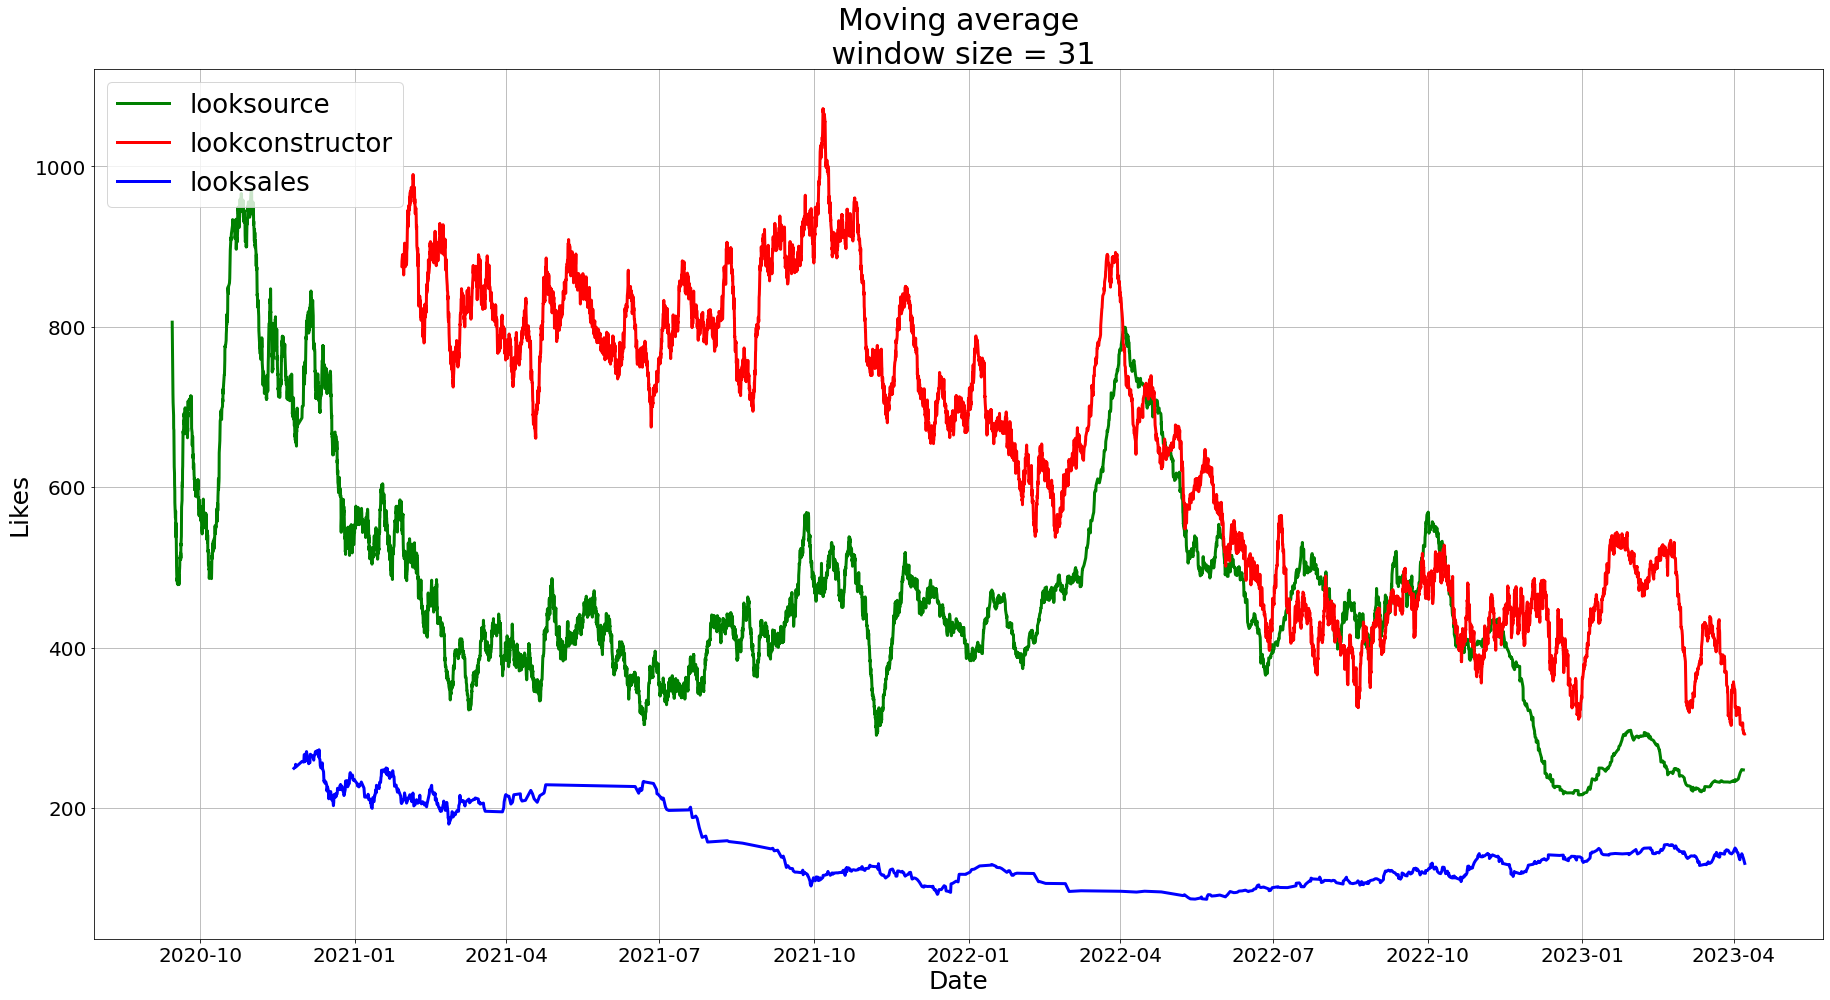

In [19]:
plt.figure(figsize=(31,16))
plot_moving_average(ts, 90, label='looksource', plot_intervals=False, plot_anomalies=False, color='g')
plot_moving_average(ts2, 90, label='lookconstructor', plot_intervals=False, plot_anomalies=False, color='r')
plot_moving_average(ts3, 31, label='looksales', plot_intervals=False, plot_anomalies=False, color='b')
plt.savefig('../reports/figures/general_likes.png')

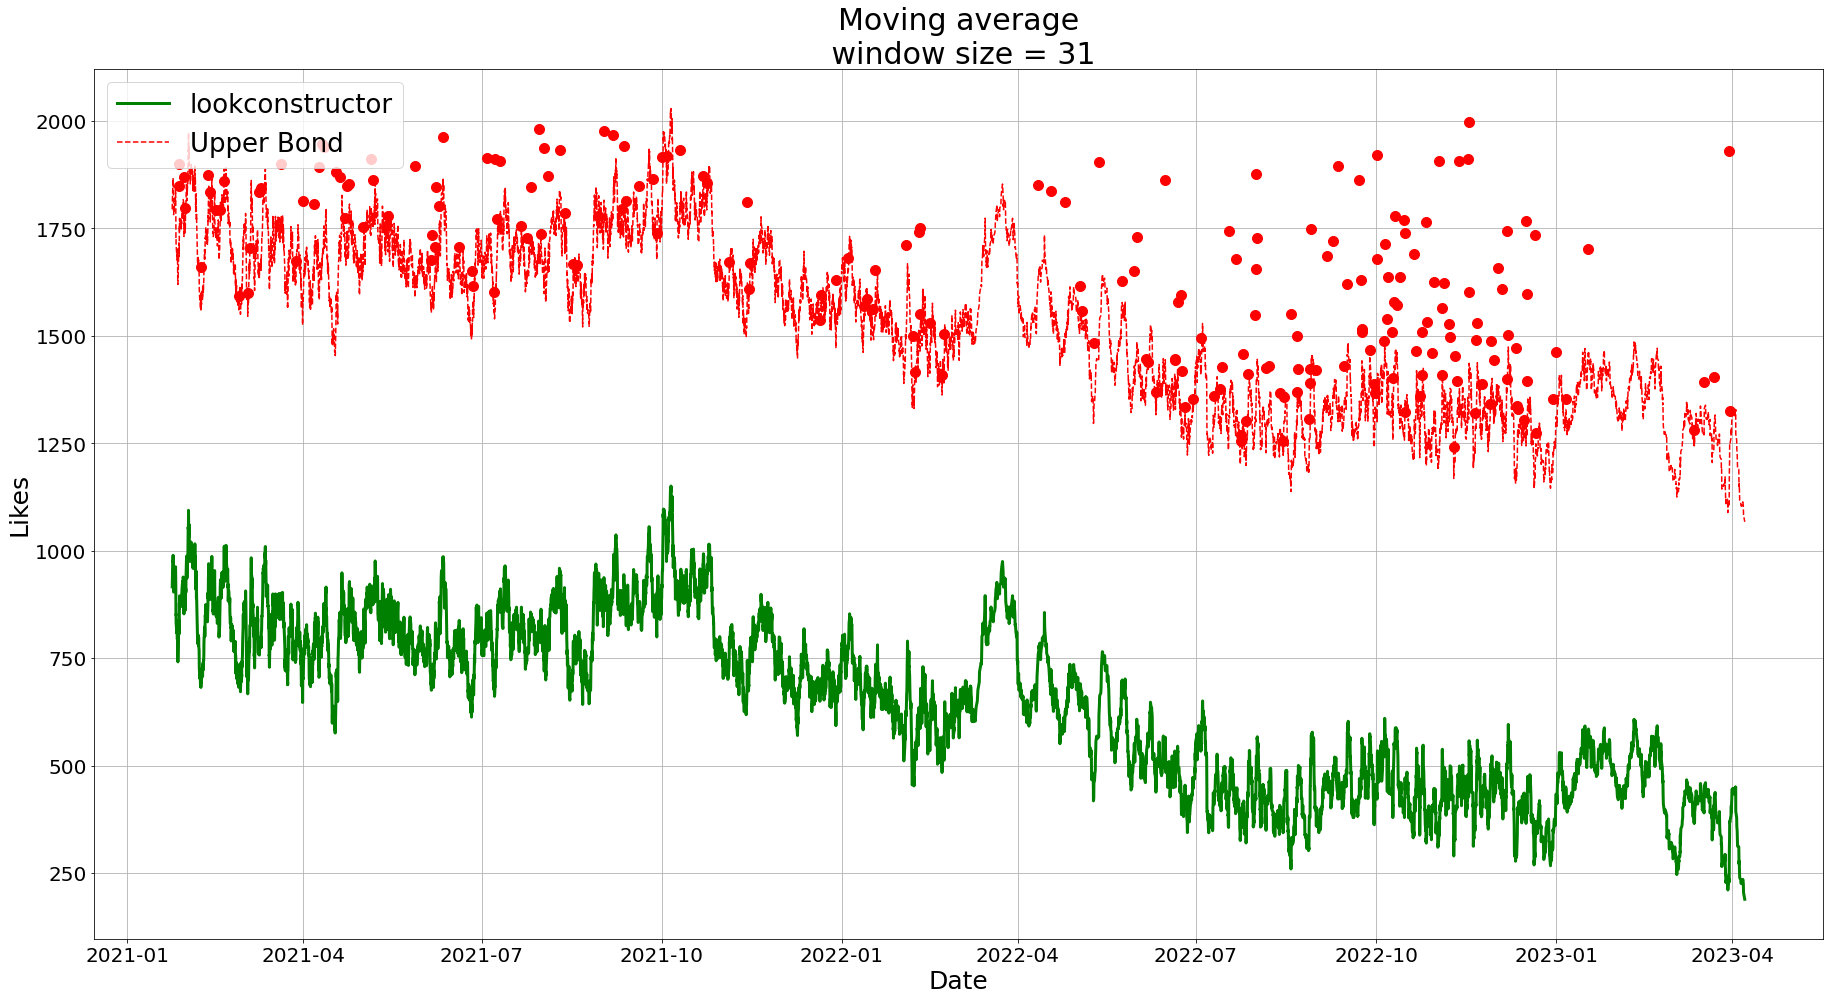

In [5]:
plt.figure(figsize=(31,16))
plot_moving_average(ts2, 31, 'lookconstructor', plot_intervals=True, plot_anomalies=True)
plt.savefig('../reports/figures/lookconstr.png')